In [ ]:
#   타임스텝    (타임스텝이 길어질수록 정보가 손실됨)
#   t-3         t-2         t-1         t

# 사인곡선

In [2]:
import numpy as np

a=np.arange(0, 10, 0.5)
print(len(a),a) #0~10까지 0.5 간격으로 값 생성

data = np.sin(a)
print(data)
print(len(data))

20 [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
20


In [3]:
#data=[1,2,3,4,5,6,7,8,9,10]

timestep = 3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측

X, y = [], []

for i in range(timestep, len(data)):
    X.append(np.array([data[i-j] for j in range(timestep, 0, -1)]))
    y.append(data[i])

print(X)    
print(y)

[array([0.        , 0.47942554, 0.84147098]), array([0.47942554, 0.84147098, 0.99749499]), array([0.84147098, 0.99749499, 0.90929743]), array([0.99749499, 0.90929743, 0.59847214]), array([0.90929743, 0.59847214, 0.14112001]), array([ 0.59847214,  0.14112001, -0.35078323]), array([ 0.14112001, -0.35078323, -0.7568025 ]), array([-0.35078323, -0.7568025 , -0.97753012]), array([-0.7568025 , -0.97753012, -0.95892427]), array([-0.97753012, -0.95892427, -0.70554033]), array([-0.95892427, -0.70554033, -0.2794155 ]), array([-0.70554033, -0.2794155 ,  0.21511999]), array([-0.2794155 ,  0.21511999,  0.6569866 ]), array([0.21511999, 0.6569866 , 0.93799998]), array([0.6569866 , 0.93799998, 0.98935825]), array([0.93799998, 0.98935825, 0.79848711]), array([0.98935825, 0.79848711, 0.41211849])]
[0.9974949866040544, 0.9092974268256817, 0.5984721441039564, 0.1411200080598672, -0.35078322768961984, -0.7568024953079282, -0.977530117665097, -0.9589242746631385, -0.7055403255703919, -0.27941549819892586, 0.

In [4]:
#신경망에 입력하기 위해 차원 변경
X, y = np.array(X).reshape(len(X), 3, 1), np.array(y).reshape(len(y), 1)
#                          샘플수, 타임스텝, 열

print(X.shape)  # 3차원
print(y.shape)  # 2차원

(17, 3, 1)
(17, 1)


In [5]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

np.random.seed(0)

model=Sequential()

# units 출력노드수
model.add(SimpleRNN(units=10, input_shape=(3, 1)))
#                     출력                 타임스텝, 변수개수
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
#                       회귀분석

#       input       hidden1     hidden2     hidden3     output
#                   순환층
#       (3,1)       time 3      10          5           1

model.compile(loss='mse', optimizer='sgd')
#              손실함수         최적

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [7]:
from datetime import datetime  
import tensorflow as tf  

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  
logdir

'c:/logs/20230725-130343'

In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(X, y, epochs=1000,callbacks=[tensorboard_callback])

#anaconda prompt에서 실행
#tensorboard --logdir=c:/logs/20230508-153907

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.4483
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.4345
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.4227
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.4128
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.4036
Epoch 6/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3952
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3883
Epoch 8/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.3818
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3755
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.3697
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.3646
Epoch 12/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.3596
Epoch 13/1000
1/1 [====================

In [9]:
model.evaluate(X,y)

1/1 [==============================] - 0s 182ms/step - loss: 0.0015


0.0015045679174363613

1/1 [==============================] - 0s 146ms/step


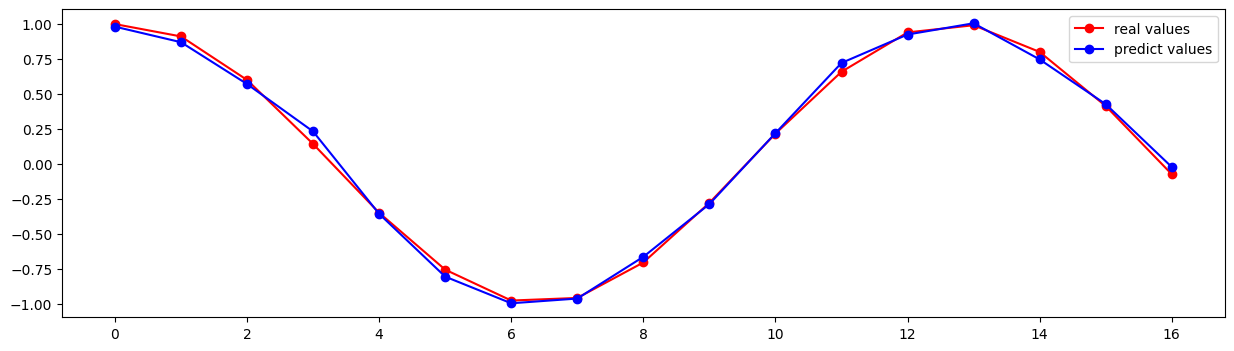

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 4))

plt.plot(data[3:], 'ro-', label='real values')  # 실제값
plt.plot(model.predict(X), 'bo-', label='predict values')   #예측값

plt.legend()

plt.show()